In [1]:
import json 
import nltk
import gensim
import pandas as pd
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(1)
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\matij\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv("dataset/data.csv", sep = ";")
df.head()

,text,label
0,fucks sake go away stupid anon — ^ https://t....,abusive
1,Damn dean just put Corbin to sleep. That Match...,abusive
2,@TheRealCamerota THAT BEER BUYING FREAKING IDI...,abusive
3,what idiot called them antacids and not afterb...,abusive
4,RT @gogglepossum: Don't you hate people that p...,abusive


In [3]:
len(df)

57707

In [4]:
labels = df["label"].tolist()
texts = df["text"].tolist()
labels = [x[:4] for x in labels]
labels

['abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'hate',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'hate',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'hate',
 'abus',
 'hate',
 'hate',
 'abus',
 'abus',
 'hate',
 'abus',
 'abus',
 'abus',
 'hate',
 'hate',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'hate',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'hate',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'hate',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'hate',
 'abus',
 'abus',
 'hate',
 'hate',
 'abus',
 'abus',
 'abus',
 'hate',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'hate',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'abus',
 'hate',
 'abus',
 

In [5]:
def preprocess(A):
    B = []
  
    for i in range(len(A)):

        text = A[i]
        # remove old style retweet text "RT"
        text = re.sub(r'^RT[\s]+', '', text)

        # remove hyperlinks
        text= re.sub(r'https?:\/\/.*[\r\n]*', '', text)

        # remove hashtags
        # only removing the hash # sign from the word
        text = re.sub(r'#', '', text)

        # remove tagging @
        text = re.sub(r"(?:\@|https?\://)\S+", "", text)

        # remove new line \n
        text = re.sub("\n", "", text)

        # remove zero length tweets
        if(len(text) == 0 ):
            continue

        B.append(text)
        
    return B

In [6]:
texts = preprocess(texts)

In [7]:
stopwords = list(gensim.parsing.preprocessing.STOPWORDS)
#print(len(stopwords))
#stopwords.extend(["like", "damn"])
print(len(stopwords))
stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    
    for token in gensim.utils.simple_preprocess(text):
        if token not in stopwords and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result


337


In [8]:
res = []
for text in texts:
    res.append(preprocess(text))


In [9]:
dictionary = gensim.corpora.Dictionary(res)
print(dictionary)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

Dictionary(37029 unique tokens: ['anon', 'away', 'fuck', 'sake', 'stupid']...)
0 anon
1 away
2 fuck
3 sake
4 stupid
5 bore
6 corbin
7 damn
8 dean
9 match
10 show


In [10]:
dictionary.filter_extremes(no_below=5, no_above=0.6, keep_n=100000)

In [11]:
bow_corpus = [dictionary.doc2bow(doc) for doc in res]


In [12]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.6444451700547595),
 (1, 0.4179039273756562),
 (2, 0.13765613090226966),
 (3, 0.5574302860924817),
 (4, 0.28349426105119935)]


In [14]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=15, id2word=dictionary, passes=2, workers=2)

In [15]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.049*"kill" + 0.048*"like" + 0.048*"idiot" + 0.026*"peopl" + 0.018*"drink" + 0.014*"american" + 0.014*"ban" + 0.013*"think" + 0.010*"need" + 0.009*"chang"


Topic: 1 
Words: 0.055*"vandal" + 0.045*"person" + 0.037*"tommi" + 0.030*"tell" + 0.023*"anal" + 0.021*"attack" + 0.019*"take" + 0.018*"ars" + 0.013*"block" + 0.013*"time"


Topic: 2 
Words: 0.190*"hate" + 0.147*"cock" + 0.052*"wikipedia" + 0.037*"lick" + 0.032*"ersi" + 0.017*"chees" + 0.017*"fuckin" + 0.016*"robert" + 0.012*"mouth" + 0.011*"chuck"


Topic: 3 
Words: 0.133*"stupid" + 0.082*"mexican" + 0.069*"block" + 0.045*"page" + 0.043*"talk" + 0.033*"whore" + 0.033*"faggot" + 0.020*"dirti" + 0.015*"racist" + 0.015*"want"


Topic: 4 
Words: 0.126*"huge" + 0.056*"bastard" + 0.046*"know" + 0.039*"like" + 0.038*"assad" + 0.036*"hanib" + 0.033*"twat" + 0.030*"homo" + 0.026*"user" + 0.022*"fggt"


Topic: 5 
Words: 0.089*"damn" + 0.037*"ball" + 0.029*"atheist" + 0.017*"rule" + 0.017*"super" + 0.016*"lmao" + 0.014*"sit

In [16]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=15, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))
    print("\n")

Topic: 0 Word: 0.016*"wiki" + 0.013*"fuck" + 0.010*"hello" + 0.009*"jerk" + 0.009*"wanker" + 0.007*"sexist" + 0.006*"editor" + 0.006*"shit" + 0.005*"hell" + 0.005*"like"


Topic: 1 Word: 0.029*"revert" + 0.020*"fuck" + 0.019*"delet" + 0.015*"shut" + 0.012*"feminazi" + 0.008*"want" + 0.007*"articl" + 0.007*"bitch" + 0.007*"messag" + 0.007*"smell"


Topic: 2 Word: 0.008*"stuff" + 0.008*"fuck" + 0.007*"hole" + 0.006*"wouldn" + 0.005*"stupid" + 0.005*"like" + 0.005*"lazi" + 0.005*"stop" + 0.005*"want" + 0.004*"edit"


Topic: 3 Word: 0.041*"faggot" + 0.018*"fuck" + 0.014*"delet" + 0.013*"wikipedia" + 0.013*"suck" + 0.012*"page" + 0.010*"block" + 0.009*"edit" + 0.009*"prick" + 0.007*"shit"


Topic: 4 Word: 0.036*"women" + 0.013*"gonna" + 0.013*"fuck" + 0.010*"nasti" + 0.010*"happi" + 0.010*"fine" + 0.010*"aliv" + 0.009*"fight" + 0.009*"nigga" + 0.008*"queer"


Topic: 5 Word: 0.025*"shit" + 0.022*"fuck" + 0.020*"dick" + 0.016*"retard" + 0.015*"homo" + 0.015*"piec" + 0.014*"whore" + 0.012*"suc

In [17]:
#lda_model = lda_model_tfidf
#bow_corpus = corpus_tfidf

IndexError: list index out of range

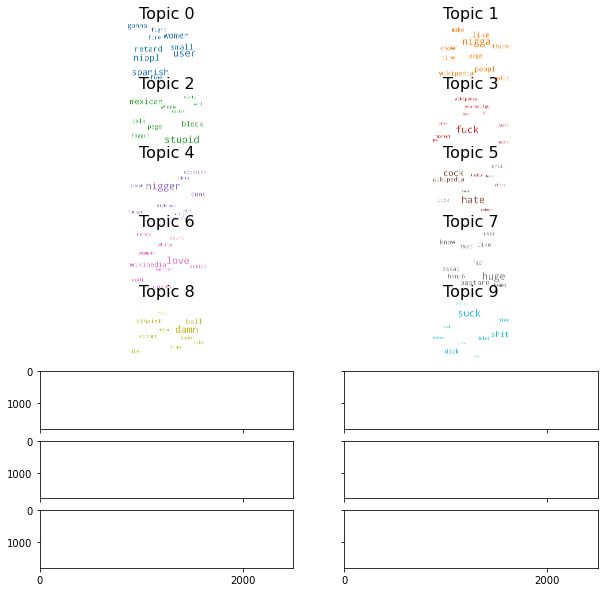

In [18]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] 

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(8, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [19]:
topics = lda_model.show_topics(15, formatted=False)
topics

[(0,
  [('kill', 0.048625115),
   ('like', 0.04842255),
   ('idiot', 0.047729153),
   ('peopl', 0.02598919),
   ('drink', 0.018448792),
   ('american', 0.0144750625),
   ('ban', 0.014075412),
   ('think', 0.012916246),
   ('need', 0.010221281),
   ('chang', 0.008531)]),
 (1,
  [('vandal', 0.054795332),
   ('person', 0.044915132),
   ('tommi', 0.036920566),
   ('tell', 0.029965026),
   ('anal', 0.022739738),
   ('attack', 0.021445803),
   ('take', 0.019251915),
   ('ars', 0.017563526),
   ('block', 0.012621816),
   ('time', 0.012511145)]),
 (2,
  [('hate', 0.19000165),
   ('cock', 0.14652555),
   ('wikipedia', 0.052290805),
   ('lick', 0.03661284),
   ('ersi', 0.031564694),
   ('chees', 0.01720468),
   ('fuckin', 0.016997065),
   ('robert', 0.015675513),
   ('mouth', 0.011509683),
   ('chuck', 0.011209774)]),
 (3,
  [('stupid', 0.1331668),
   ('mexican', 0.08210417),
   ('block', 0.06878541),
   ('page', 0.044704042),
   ('talk', 0.042881746),
   ('whore', 0.033199035),
   ('faggot', 0.

In [20]:
df1 = pd.DataFrame(columns = ["text"])

for i in range(len(topics)):
    
    words = [x[0] for x in topics[i][1]]
    words = ", ".join(words[:5])
    print(f"{i} {words}")
    df1 = df1.append({"text": words}, ignore_index = True)
    
df1

0 kill, like, idiot, peopl, drink
1 vandal, person, tommi, tell, anal
2 hate, cock, wikipedia, lick, ersi
3 stupid, mexican, block, page, talk
4 huge, bastard, know, like, assad
5 damn, ball, atheist, rule, super
6 nigga, like, peopl, know, wikipedia
7 faggot, bitch, niggaeat, suck, scum
8 suck, shit, dick, piec, delet
9 asshol, edit, post, right, say
10 fuck, moron, yourselfgo, wikipedia, pussi
11 user, spanish, nippl, women, retard
12 peni, rape, imag, live, vagina
13 love, wikipedia, remov, codi, white
14 nigger, cunt, cocksuck, fucker, admin


,text
0,"kill, like, idiot, peopl, drink"
1,"vandal, person, tommi, tell, anal"
2,"hate, cock, wikipedia, lick, ersi"
3,"stupid, mexican, block, page, talk"
4,"huge, bastard, know, like, assad"
5,"damn, ball, atheist, rule, super"
6,"nigga, like, peopl, know, wikipedia"
7,"faggot, bitch, niggaeat, suck, scum"
8,"suck, shit, dick, piec, delet"
9,"asshol, edit, post, right, say"


In [21]:
print(len(topics))

15


In [22]:
lda_model[bow_corpus[1]]

[(1, 0.13571529), (5, 0.613143), (10, 0.15110572)]

In [23]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=res, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.143566336612864

Coherence Score:  0.5487190340667442


In [24]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.132871  0.005913       1        1  13.276073
10     0.177190  0.048048       2        1   9.818077
0     -0.130031 -0.009581       3        1   9.668002
9     -0.093333  0.032689       4        1   8.674274
13    -0.111198 -0.013628       5        1   7.177198
8      0.198762  0.055561       6        1   6.612224
1     -0.116517  0.011378       7        1   6.456196
14     0.266538 -0.317744       8        1   6.307415
11    -0.098725 -0.027992       9        1   5.247473
4     -0.083048 -0.077556      10        1   4.931960
3     -0.020357  0.162697      11        1   4.659625
7      0.190289  0.241864      12        1   4.380144
5     -0.088904 -0.089227      13        1   4.378675
12    -0.073028 -0.054549      14        1   4.333256
2      0.115233  0.032126      15        1   4.079410, topic_info=        Term          Freq         Total Category  logprob  loglift
2       fuck  48828.000000  48828.000000  Default  30.0000  30.0000
5945  nigger  19369.000000  19369.000000  Default  29.0000  29.0000
920     suck  17994.000000  17994.000000  Default  28.0000  28.0000
1827  faggot  13548.000000  13548.000000  Default  27.0000  27.0000
30     bitch   9438.000000   9438.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
986     bear    163.983081    336.022573  Topic15  -5.3789   2.4818
680   famili    165.333411    571.222548  Topic15  -5.3707   1.9594
2319    eras     91.674004    137.030484  Topic15  -5.9605   2.7973
920     suck    211.688930  17994.993821  Topic15  -5.1236  -1.2435
1768    fail     97.711123    420.086093  Topic15  -5.8967   1.7408

[953 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
4983      9  0.986150      absorb
698       2  0.006263        abus
698       3  0.021293        abus
698       4  0.092688        abus
698       5  0.737747        abus
...     ...       ...         ...
305      13  0.086160        year
305      14  0.011238        year
144       1  0.993309        your
144      10  0.003184        your
9039      2  0.999621  yourselfgo

[3226 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 11, 1, 10, 14, 9, 2, 15, 12, 5, 4, 8, 6, 13, 3])

In [25]:
test = lda_model[bow_corpus[3]]
test

C:\Users\matij\anaconda3\envs\nlp\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 0.68888116),
 (1, 0.022222832),
 (2, 0.02222276),
 (3, 0.022222795),
 (4, 0.022222757),
 (5, 0.02222276),
 (6, 0.022222802),
 (7, 0.022222765),
 (8, 0.022222757),
 (9, 0.022222774),
 (10, 0.02222276),
 (11, 0.022222757),
 (12, 0.022222772),
 (13, 0.02222279),
 (14, 0.02222276)]

In [26]:
def argmax(pairs):
    return max(pairs, key=lambda x: x[1])[0]

C:\Users\matij\anaconda3\envs\nlp\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
old_labels = dict()
for i in range(len(bow_corpus)):
    key = max(lda_model[bow_corpus[i]], key=lambda x: x[1])[0]
    x = old_labels.get(key)
    if x is None:
        x = []
        old_labels[key] = x
    x.append(labels[i])

C:\Users\matij\anaconda3\envs\nlp\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
for i in range(15):
    labs, occ = np.unique(old_labels[i], return_counts = True)
    print(f"{i}")
    for tup in list(zip(labs, occ/sum(occ))):
        print(tup)

0
('abus', 0.08415062356217459)
('bene', 0.04479961254389151)
('cybe', 0.006417241796827703)
('hate', 0.06562537837510594)
('iden', 0.02409492674657949)
('insu', 0.13597287807240585)
('obsc', 0.12265407434314081)
('offe', 0.013924203898777092)
('prof', 0.01610364450902046)
('raci', 0.003632401017072285)
('sexi', 0.08051822254510231)
('spam', 0.10751907010533963)
('thre', 0.012350163458045769)
('toxi', 0.28223755902651654)
1
('abus', 0.09245562130177515)
('bene', 0.02440828402366864)
('cybe', 0.004930966469428008)
('hate', 0.07075936883629191)
('iden', 0.015779092702169626)
('insu', 0.11316568047337278)
('obsc', 0.11932938856015779)
('offe', 0.013067061143984222)
('prof', 0.016518737672583828)
('raci', 0.0019723865877712033)
('sexi', 0.06829388560157791)
('spam', 0.19773175542406313)
('thre', 0.007642998027613412)
('toxi', 0.2539447731755424)
2
('abus', 0.10426829268292682)
('bene', 0.04878048780487805)
('cybe', 0.0006097560975609756)
('hate', 0.06646341463414634)
('iden', 0.02560975609

C:\Users\matij\anaconda3\envs\nlp\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
old_labels = dict()
for i in range(len(bow_corpus)):
    key = labels[i]
    new_topic = max(lda_model[bow_corpus[i]], key=lambda x: x[1])[0]
    x = old_labels.get(key)
    if x is None:
        x = []
        old_labels[key] = x
    x.append(new_topic)

C:\Users\matij\anaconda3\envs\nlp\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
for key in old_labels.keys():
    labs, occ = np.unique(old_labels[key], return_counts = True)
    print(f"{key}")
    for tup in list(zip(labs, occ/sum(occ))):
        print(tup)

abus
(0, 0.1660752306600426)
(1, 0.08776910338301395)
(2, 0.039507925242488764)
(3, 0.0361958836053939)
(4, 0.043766264490182165)
(5, 0.0773598296664301)
(6, 0.149041873669269)
(7, 0.03856162763189023)
(8, 0.0220014194464159)
(9, 0.061272770286255024)
(10, 0.0766501064584812)
(11, 0.05630470783061273)
(12, 0.052046368582919326)
(13, 0.0858765081618169)
(14, 0.007570380884788266)
hate
(0, 0.17919841006955944)
(1, 0.09605829744948659)
(2, 0.03577343491222259)
(3, 0.041073203047366676)
(4, 0.05134150380920835)
(5, 0.07552169592580324)
(6, 0.14739980125869492)
(7, 0.023517721099701887)
(8, 0.012918184829413714)
(9, 0.07519046041735675)
(10, 0.028155018217952965)
(11, 0.04074196753892017)
(12, 0.07485922490891024)
(13, 0.11228883736336535)
(14, 0.0059622391520370984)
spam
(0, 0.11423798509380621)
(1, 0.10228732973528656)
(2, 0.03662297609868928)
(3, 0.029298380878951428)
(4, 0.07183243382163969)
(5, 0.10704189154459008)
(6, 0.14533538936006168)
(7, 0.021716782318170137)
(8, 0.01272166538164

C:\Users\matij\anaconda3\envs\nlp\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
